In [1]:
import numpy as np
import pandas as pd

In [76]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
print(train.shape)
print(test.shape)
print(train.info())
print(test.info())

(1460, 81)
(1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exter

In [46]:
train=train.drop(['Alley','FireplaceQu','PoolQC', 'Fence','MiscFeature'], axis=1)
test=test.drop(['Alley','FireplaceQu','PoolQC', 'Fence','MiscFeature'], axis=1)

In [77]:
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [78]:
corr=train.corr()
corrsales=corr[np.abs(corr['SalePrice'])>0.5].index
train2=pd.DataFrame(train, columns=corrsales)
corr2=train2.corr()
corr2

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.572323,0.550684,0.537808,0.476224,0.593007,0.550600,0.427452,0.600671,0.562022,0.790982
YearBuilt,0.572323,1.000000,0.592855,0.391452,0.281986,0.199010,0.468271,0.095589,0.537850,0.478954,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,0.291066,0.240379,0.287389,0.439046,0.191740,0.420622,0.371600,0.507101
TotalBsmtSF,0.537808,0.391452,0.291066,1.000000,0.819530,0.454868,0.323722,0.285573,0.434585,0.486665,0.613581
1stFlrSF,0.476224,0.281986,0.240379,0.819530,1.000000,0.566024,0.380637,0.409516,0.439317,0.489782,0.605852
GrLivArea,0.593007,0.199010,0.287389,0.454868,0.566024,1.000000,0.630012,0.825489,0.467247,0.468997,0.708624
FullBath,0.550600,0.468271,0.439046,0.323722,0.380637,0.630012,1.000000,0.554784,0.469672,0.405656,0.560664
TotRmsAbvGrd,0.427452,0.095589,0.191740,0.285573,0.409516,0.825489,0.554784,1.000000,0.362289,0.337822,0.533723
GarageCars,0.600671,0.537850,0.420622,0.434585,0.439317,0.467247,0.469672,0.362289,1.000000,0.882475,0.640409
GarageArea,0.562022,0.478954,0.371600,0.486665,0.489782,0.468997,0.405656,0.337822,0.882475,1.000000,0.623431


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

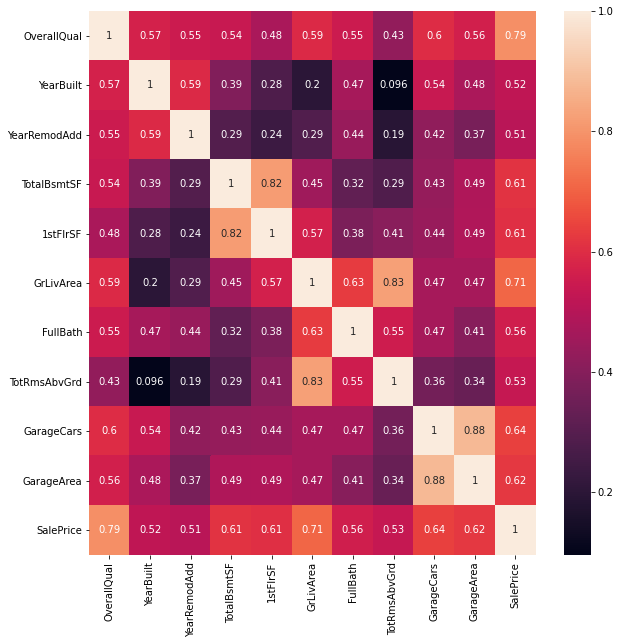

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(corr2, annot=True)

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [73]:
kfold=KFold(n_splits=10, shuffle=True, random_state=43)

In [94]:
model=RandomForestRegressor(n_estimators=200, n_jobs=-1)

In [80]:
corrsales2=corrsales[:10]

In [81]:
xTrain=train[corrsales2]
xTest=test[corrsales2]

In [82]:
yTrain=train['SalePrice']

In [91]:
xTest=xTest.fillna(xTest.mean())

In [96]:
model.fit(xTrain, yTrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [97]:
yPred=model.predict(xTest)
yPred

array([123996.905, 149437.25 , 168587.805, ..., 148390.61 , 106978.5  ,
       233346.255])

In [100]:
model.score(xTrain, yTrain)

0.9787783770355265

In [101]:
mysubmit=pd.DataFrame({'Id': test['Id'], 'SalePrice':yPred})
mysubmit.to_csv("mysubmit.csv", index=False)